## Chapter 1

In [91]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1.1

In [92]:
sigma = 10.
rho = 28.
beta = 8./3
dt = 0.001
a = 1./np.sqrt(dt)

fakt = 1.99999
N = 2 * 10**5

x = -.587
y = -.563
z = 16.870

g1 = a * (1./np.sqrt(2) - 0.5)
g2 = a * (1./np.sqrt(3) - 0.5)
g3 = a * (1./np.sqrt(5) - 0.5)

res = np.zeros((N,7))

for i in range(N):
    res[i] = [i, x, y, z, g1, g2, g3]
    
    if ((g1 >= -a/2) and (g1 <0)):
        g1 = a * (fakt * g1 / a + 0.5)
    else:
        g1 = a * (-fakt * g1 / a + 0.5)
        
    if ((g2 >= -a/2) and (g2 < 0)):
        g2 = a * (fakt * g2 / a + 0.5)
    else:
        g2 = a * (-fakt * g2 / a + 0.5)
    
    if ((g3 >= -a/2) and (g3 < 0)):
        g3 = a * (fakt * g3 / a + 0.5)
    else:
        g3 = a * (-fakt * g3 / a + 0.5)
        
    xn = x + dt * ((sigma * (y - x)) + g1)
    yn = y + dt * ((x * (rho - z) - y) + g2)
    zn = z + dt * ((x * y - beta * z) + g3)
    
    x = xn
    y = yn
    z = zn

res[:,0] *= dt

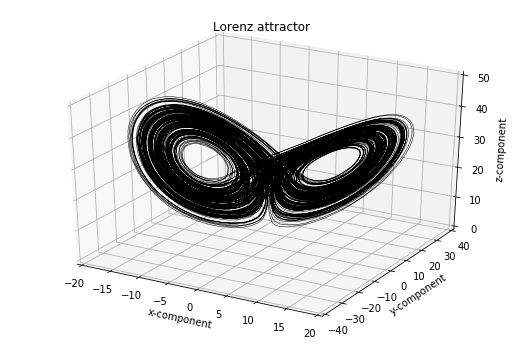

In [115]:
from mpl_toolkits import mplot3d

fig0 = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot3D(res[:,1],res[:,2],res[:,3], 'k', linewidth=0.5)
ax.set_xlabel('x-component')
ax.set_ylabel('y-component')
ax.set_zlabel('z-component')
ax.set_title('Lorenz attractor')

ax.set_xlim(-20,20)
ax.set_ylim(-40,40)
ax.set_zlim(0,50)
plt.show()

### Example 1.2

In [94]:
meas = np.zeros((N*4,2))
a = 4.
fakt = 1.99999
eta1 = a * (2**(-1./2) - 0.5)

for i in range(N*4):
    if ((eta1 >= -a/2) and (eta1 < 0)):
        eta1 = (fakt * eta1 + 0.5 * a)
    else:
        eta1 = (-fakt * eta1 + 0.5 * a)
    meas[i] = [i+1, eta1]
    
measerr = meas[:,1][::10]

Nout = 50
obsx = np.zeros((N/Nout,3))

j=0
i=0

for k in range(1,N,Nout):
    err = 1./20 * np.sum(measerr[j:j+20])
    obsx[i] = [res[k,0], res[k,1], err]
    i += 1
    j += 20

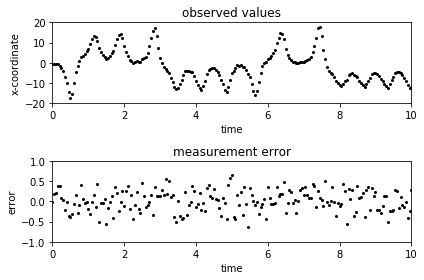

In [95]:
fig1 = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(obsx[:,0], obsx[:,1] + obsx[:,2], 'ko', markersize=2.0)
plt.ylim(-20,20)
plt.xlim(0,10)
plt.xlabel('time')
plt.ylabel('x-coordinate')
plt.title('observed values')
plt.subplot(2, 1, 2)
plt.plot(obsx[:,0], obsx[:,2], 'ko', markersize=2.0)
plt.ylim(-1,1)
plt.xlim(0,10)
plt.xlabel('time')
plt.ylabel('error')
plt.title('measurement error')
plt.tight_layout()
plt.show()

### Example 1.4

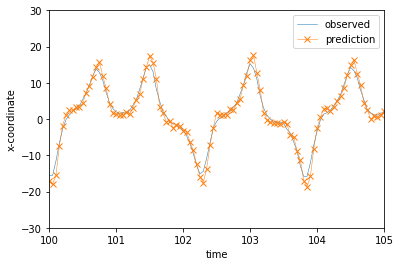

0.9712624762114671


In [96]:
obs = np.array([obsx[:,0], obsx[:,1]+obsx[:,2]])
ypred = np.zeros((2000,2))
j = 0

for i in range(1999, obs.shape[1]-1):
    ypred[j] = [obs[0][i+1], 2.*obs[1][i]-obs[1][i-1]]
    j += 1
    
rmse1 = np.sqrt((1./ (obs.shape[1]-1)) * np.sum(np.abs(obs[1][2001:] - ypred[1:,1])**2))

fig2 = plt.figure()
plt.plot(obs[0], obs[1],label='observed', linewidth=0.5)
plt.plot(ypred[:,0],ypred[:,1], 'x-', label='prediction', linewidth=0.5)
plt.xlim(100,105)
plt.ylim(-30,30)
plt.xlabel('time')
plt.ylabel('x-coordinate')
plt.legend()
plt.show()

print(rmse1)

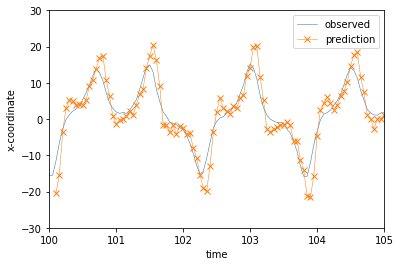

2.4825757164871614


In [97]:
ypred = np.zeros((2000-2,2))
j = 0

for i in range(2000,obs.shape[1]-2):
    ypred[j] = [obs[0][i+2], 3.*obs[1][i] - 2.*obs[1][i-1]]
    j += 1
    
rmse2 = np.sqrt((1./ (obs.shape[1]-1)) * np.sum(np.abs(obs[1][2004:] - ypred[2:,1])**2))

fig3 = plt.figure()
plt.plot(obs[0], obs[1],label='observed', linewidth=0.5)
plt.plot(ypred[:,0],ypred[:,1], 'x-', label='prediction', linewidth=0.5)
plt.xlim(100,105)
plt.ylim(-30,30)
plt.xlabel('time')
plt.ylabel('x-coordinate')
plt.legend()
plt.show()

print(rmse2)

### Example 1.5

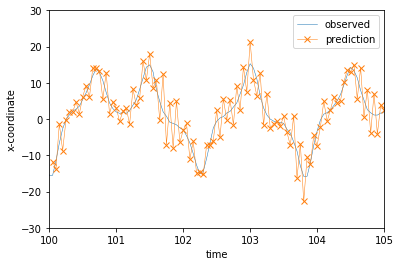

3.0611420713803925


In [98]:
def lininterpol(a0,a1,a2,a3,a4,obs,i):
    return a0 * obs[1][i] + a1 * obs[1][i-1] + a2 * obs[1][i-2] + a3 * obs[1][i-3] + a4 * obs[1][i-4]

a0 = 5
a1 = -10
a2 = 10
a3 = -5
a4 = 1

ypred = np.zeros((2000-1,2))
j = 0

for i in range(2000,obs.shape[1]-1):
    ypred[j] = [obs[0][i+1], lininterpol(a0,a1,a2,a3,a4,obs,i)]
    j += 1

rmse1 = np.sqrt((1./ (obs.shape[1]-1)) * np.sum(np.abs(obs[1][2002:] - ypred[1:,1])**2))

fig4 = plt.figure()
plt.plot(obs[0], obs[1],label='observed', linewidth=0.5)
plt.plot(ypred[:,0],ypred[:,1], 'x-', label='prediction', linewidth=0.5)
plt.xlim(100,105)
plt.ylim(-30,30)
plt.xlabel('time')
plt.ylabel('x-coordinate')
plt.legend()
plt.show()

print(rmse1)

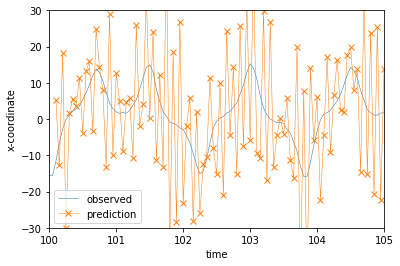

13.022008665359193


In [99]:
a0 = 15
a1 = -40
a2 = 45
a3 = -24
a4 = 5

ypred = np.zeros((2000-2,2))
j = 0

for i in range(2000,obs.shape[1]-2):
    ypred[j] = [obs[0][i+2], lininterpol(a0,a1,a2,a3,a4,obs,i)]
    j += 1

rmse2 = np.sqrt((1./ (obs.shape[1]-1)) * np.sum(np.abs(obs[1][2004:] - ypred[2:,1])**2))

fig5 = plt.figure()
plt.plot(obs[0], obs[1],label='observed', linewidth=0.5)
plt.plot(ypred[:,0],ypred[:,1], 'x-', label='prediction', linewidth=0.5)
plt.xlim(100,105)
plt.ylim(-30,30)
plt.xlabel('time')
plt.ylabel('x-coordinate')
plt.legend()
plt.show()

print(rmse2)

### Example 1.6

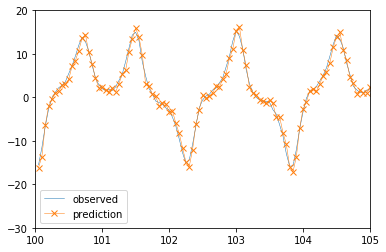

0.9873894127662968
[-0.14739847  0.46062221 -0.09892658 -1.34701031  2.0943411 ]


In [100]:
p = 4
k = 1 # number of steps for forward prediction

Data_Points = obs.shape[1]
STEPS = Data_Points/2 + 1 - k

y = obs[1][:STEPS]

A = np.zeros((STEPS-p-k, p+1))

for i in range(p+1):
    #print("p-i = %i, i = %i, STEPS-p-1+i = %i" %(p-i,i, STEPS-p-1+i))
    A[:,i] = (y[i:STEPS-p-k+i])

b = obs[1][p+k:STEPS]

c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,b))

residual = b - np.dot(A,c)

jj = 0
RMSE = 0
y_obs = np.zeros((STEPS - 1))
time = np.zeros((STEPS - 1))
y_predict = np.zeros((STEPS - 1))

for i in range(Data_Points/2, Data_Points/2 + STEPS - 1):
    yn = obs[1][i-p:i+1]
    predn = np.dot(yn.T,c)
    y_obs[jj] = obs[1][i+k]
    time[jj] = 0.05*(i+k)
    y_predict[jj] = predn
    RMSE += (predn-obsx[:,1][i+k])**2
    jj += 1
    
RMSE = np.sqrt(1./ (STEPS-p-1) * RMSE)

fig6 = plt.figure()
plt.plot(time, y_obs, '-', label='observed', linewidth=0.5)
plt.plot(time, y_predict, '-x', label='prediction', linewidth=0.5)
plt.xlim(100,105)
plt.ylim(-30,20)
plt.legend()
plt.show()

print(RMSE)
print(c)

### Example 1.7

In [101]:
x = -.587
y = -.563
z = 16.870

resm = np.zeros((N,4))

for i in range(N):
    resm[i] = [i, x, y, z]
        
    xn = x + dt * (sigma * (y - x))
    yn = y + dt * (x * (rho - z) - y)
    zn = z + dt * (x * y - beta * z)
    
    x = xn
    y = yn
    z = zn
    
resm[:,0] *= dt
resmech = resm[::(Nout)]
ressug = res[::Nout]

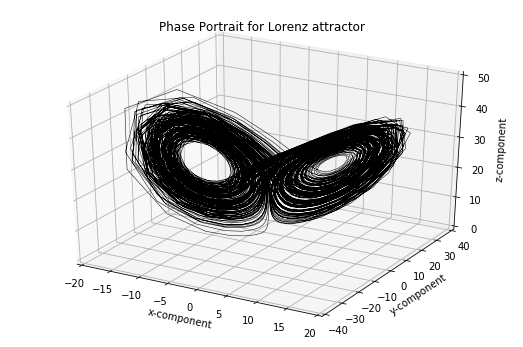

In [114]:
from mpl_toolkits import mplot3d

fig7 = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot3D(resmech[:,1],resmech[:,2],resmech[:,3], 'k', linewidth=0.5)
ax.set_xlabel('x-component')
ax.set_ylabel('y-component')
ax.set_zlabel('z-component')
ax.set_title('Phase Portrait for Lorenz attractor')

ax.set_xlim(-20,20)
ax.set_ylim(-40,40)
ax.set_zlim(0,50)
plt.show()

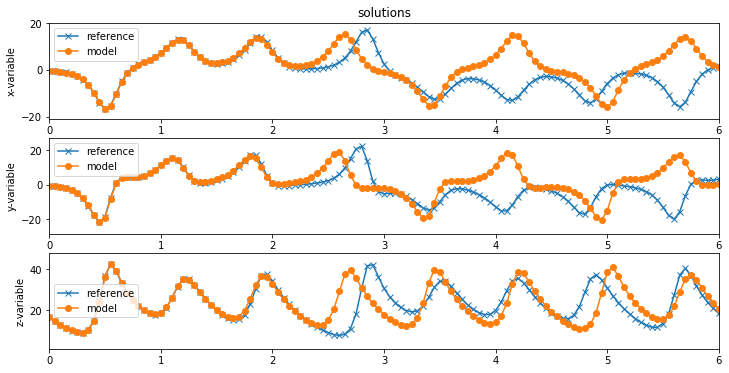

In [108]:
fig8 = plt.figure(figsize=(12,6))
ax = fig8.add_subplot(3, 1, 1)
ax.plot(ressug[:,0],ressug[:,1],'x-',label='reference')
ax.plot(resmech[:,0],resmech[:,1],'o-',label='model')
ax.set_title("solutions")
ax.set_ylabel("x-variable")
ax.set_xlim([0.,6.])
ax.legend()
ax = fig8.add_subplot(3, 1, 2)
ax.plot(ressug[:,0],ressug[:,2],'x-',label='reference')
ax.plot(resmech[:,0],resmech[:,2],'o-',label='model')
ax.set_ylabel("y-variable")
ax.set_xlim([0.,6.])
ax.legend()
ax = fig8.add_subplot(3, 1, 3)
ax.plot(ressug[:,0],ressug[:,3],'x-',label='reference')
ax.plot(resmech[:,0],resmech[:,3],'o-',label='model')
ax.set_ylabel("z-variable")
ax.set_xlim([0.,6.])
ax.legend()
plt.show()

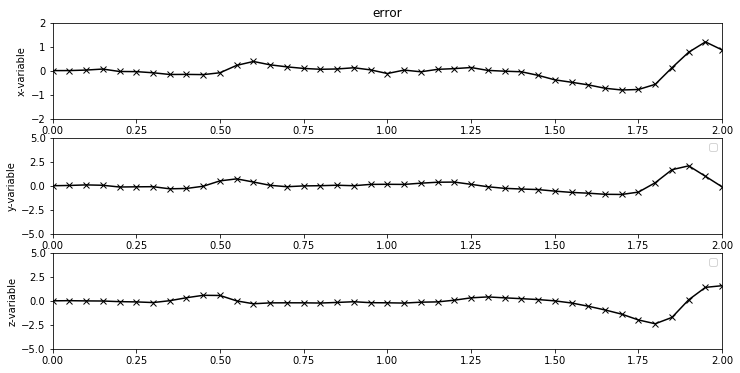

In [112]:
fig9 = plt.figure(figsize=(12,6))
ax = fig9.add_subplot(3, 1, 1)
ax.plot(ressug[:,0],ressug[:,1]-resmech[:,1],'kx-')
ax.set_title("error")
ax.set_ylabel("x-variable")
ax.set_xlim([0.,2.])
ax.set_ylim([-2.,2.])
ax = fig9.add_subplot(3, 1, 2)
ax.plot(ressug[:,0],ressug[:,2]-resmech[:,2],'kx-')
ax.set_ylabel("y-variable")
ax.set_xlim([0.,2.])
ax.set_ylim([-5.,5.])
ax.legend()
ax = fig9.add_subplot(3, 1, 3)
ax.plot(ressug[:,0],ressug[:,3]-resmech[:,3],'kx-')
ax.set_ylabel("z-variable")
ax.set_xlim([0.,2.])
ax.set_ylim([-5.,5.])
ax.legend()
plt.show()

### Example 1.8

In [214]:
# Lorenz model as a surrogate physical process

sigm = 10.
rho = 28.
beta = 8./3
dt =0.001
Nout = 50
a = 1. / np.sqrt(dt)
fakt = 1.99999
N = 2 * 10**5

# initial conditions
x = -.587
y = -.563
z = 16.870
g1 = a * (1. / np.sqrt(2.) - .5)
g2 = a * (1. / np.sqrt(3.) - .5)
g3 = a * (1. / np.sqrt(5.) - .5)
res = np.zeros((N,7))

def gi(gi):
    if ((gi >= -a/2) and gi < 0):
        return a * (fakt * gi / a + 0.5)
    else:
        return a * (-fakt * gi / a + 0.5)
        
for i in range(N):
    res[i,:] = [i, x, y, z, g1, g2, g3]
    
    g1 = gi(g1)
    g2 = gi(g2)
    g3 = gi(g3)
    
    xn = x + dt * (sigm * (y - x)) + dt * g1
    yn = y + dt * (x * (rho - z) - y) + dt * g2
    zn = z + dt * (x * y - beta * z) + dt * g3
    
    x, y, z = xn, yn, zn
    
res[:,0] *= dt

# store only points with dt = 0.05
ressug = res[::Nout]

# add measurement error using tent map
meas = np.zeros((N*4,2))
a = 4.
fakt = 1.99999
eta1 = a * (2.**(-1./2) - 0.5)

for i in range(N*4):
    if ((eta1 >= -a/2) and (eta1 < 0)):
        eta1 = (fakt * eta1 + 0.5 * a)
    else:
        eta1 = (-fakt * eta1 + 0.5 * a)
    meas[i] = [i+1, eta1]
    
measerr = meas[:,1][::10]

# observation of x-component (dt = 0.05, first 200 datapoints)
obsx = np.zeros((N/Nout,3))
j = 0
i = 0

for k in range(0,N,Nout):
    err = 1./20 * np.sum(measerr[j:j+20])
    obsx[i] = [res[k,0], res[k,1], err]
    i += 1
    j += 20
    
obsx = np.array(obsx)
obs = [obsx[:,0], obsx[:,1] + obsx[:,2]]
obs = np.array(obs)

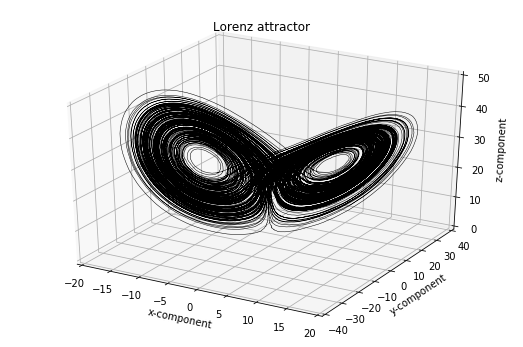

In [215]:
fig10 = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot3D(res[:,1],res[:,2],res[:,3], 'k', linewidth=0.5)
ax.set_xlabel('x-component')
ax.set_ylabel('y-component')
ax.set_zlabel('z-component')
ax.set_title('Lorenz attractor')

ax.set_xlim(-20,20)
ax.set_ylim(-40,40)
ax.set_zlim(0,50)
plt.show()

In [290]:
# now do assimilation cycles
x0 = -.587
y0 = -.563
z0 = 16.870

NA = 5 # 5 observations over 40 observation windows; Nout determines the observation intervals.
CYCLES = 40
alpha = 0.025

KS = 1
x_fg = x0
y_fg = y0
z_fg = z0

x_anal = np.zeros((CYCLES*NA+1))
y_anal = np.zeros((CYCLES*NA+1))
z_anal = np.zeros((CYCLES*NA+1))

for lll in range(CYCLES):
    x = np.zeros((NA+1))
    y = np.zeros((NA+1))
    z = np.zeros((NA+1))
    t = np.zeros((NA+1))
    
    x[0] = x_fg
    y[0] = y_fg
    z[0] = z_fg
    t[0] = 0.
    
    vareps = 1.
    ll = 1.
    W = []
    
    while vareps >= 1e-2:
        JAC = np.eye(3)
        H = np.array([1, 0, 0])
        dV = np.zeros((3,NA))
        r = np.zeros((NA))
        
        for j in range(NA):
            xh = x[j]
            yh = y[j]
            zh = z[j]
            
            for i in range(Nout):
                xo = xh
                yo = yh
                zo = zh
                
                xh = xo + dt * 10. * (yo - xo)
                yh = yo + dt * (xo * (28. - zo) - yo)
                zh = zo + dt * (xo * yo - 8./3 * zo)
                
                DF = np.array([[-10., 10., 0.],[28. - zo, -1., -xo],[yo, xo, -8./3]])
                
                JAC = np.dot((np.eye(3) + dt * DF) , JAC)
            
            x[j+1] = xh
            y[j+1] = yh
            z[j+1] = zh

            r[j] = xh - obs[1,j+KS]
            #print(r)
            dV[:,j] = np.dot(JAC.T,H.T*r[j])
            #print(dV) 
            t[j+1] = dt * Nout * (j+1)
            
        W.append(.5 * np.sum(r**2))
        dW = np.sum(dV, axis=1)
        
        vareps = np.linalg.norm(dW)
        ll += 1
        
        x[0] -= alpha * dW[0]
        y[0] -= alpha * dW[1]
        z[0] -= alpha * dW[2]

    x_anal[KS-1:KS+NA] = x
    y_anal[KS-1:KS+NA] = y
    z_anal[KS-1:KS+NA] = z
    
    x_fg = x[-1]
    y_fg = y[-1]
    z_fg = z[-1]
    
    KS = KS+NA
    
    print(lll)
    
rmseX = np.sqrt(np.mean((ressug[:KS,1] - x_anal[:KS])**2))
rmseY = np.sqrt(np.mean((ressug[:KS,2] - y_anal[:KS])**2))
rmseZ = np.sqrt(np.mean((ressug[:KS,3] - z_anal[:KS])**2))

print(rmseX,rmseY,rmseZ)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
(0.3319684324364738, 0.46310603493408464, 0.840418739825367)


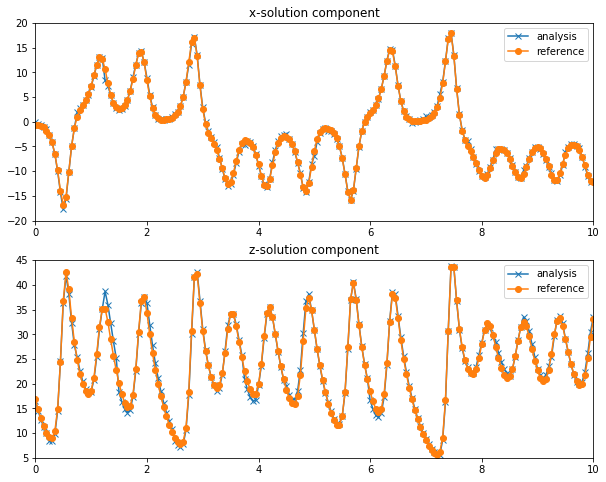

In [291]:
fig11 = plt.figure(figsize=(10,8))
ax = fig11.add_subplot(2, 1, 1)
ax.plot(ressug[:KS,0], x_anal[:KS], '-x', label="analysis")
ax.plot(ressug[:KS,0], ressug[:KS,1], '-o', label="reference")
ax.set_ylim([-20,20])
ax.set_xlim([0,10])
ax.set_title("x-solution component")
ax.legend()

ax = fig11.add_subplot(2, 1, 2)
ax.plot(ressug[:KS,0], z_anal[:KS], '-x', label="analysis")
ax.plot(ressug[:KS,0], ressug[:KS,3], '-o', label="reference")
ax.set_ylim([5,45])
ax.set_xlim([0,10])
ax.set_title("z-solution component")
ax.legend()
plt.show()

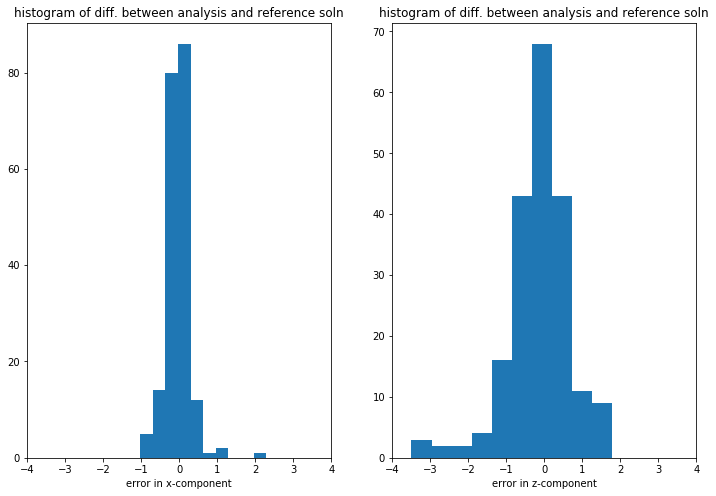

In [292]:
fig12 = plt.figure(figsize=(12,8))
ax = fig12.add_subplot(1, 2, 1)
ax.hist(ressug[:KS,1]-x_anal[:KS])
ax.set_xlabel('error in x-component')
ax.set_title('histogram of diff. between analysis and reference soln')
ax.set_xlim([-4,4])

ax = fig12.add_subplot(1, 2, 2)
ax.hist(ressug[:KS,3]-z_anal[:KS])
ax.set_xlabel('error in z-component')
ax.set_title('histogram of diff. between analysis and reference soln')
ax.set_xlim([-4,4])
plt.show()

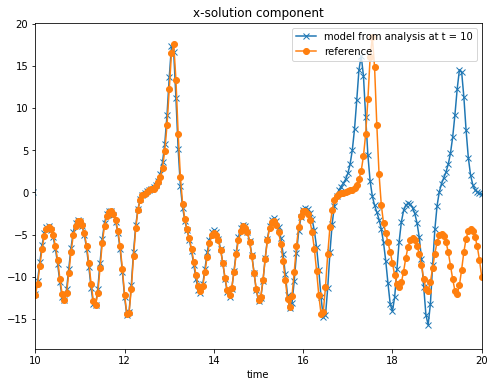

In [295]:
# forecast from last analysis
CYCLES1 = 40
KS = 201

xF_fg = np.copy(x_fg)
yF_fg = np.copy(y_fg)
zF_fg = np.copy(z_fg)

x_analF = np.zeros((CYCLES*NA+CYCLES1*NA+1))
y_analF = np.zeros((CYCLES*NA+CYCLES1*NA+1))
z_analF = np.zeros((CYCLES*NA+CYCLES1*NA+1))

for lll in range(CYCLES1):
    xF = np.zeros((NA+1))
    yF = np.zeros((NA+1))
    zF = np.zeros((NA+1))
    tF = np.zeros((NA+1))
    
    xF[0] = xF_fg
    yF[0] = yF_fg
    zF[0] = zF_fg
    tF[0] = 0.
    
    ll = 1
    
    for j in range(NA):
        xh = xF[j]
        yh = yF[j]
        zh = zF[j]
        
        for i in range(Nout):
            xo = xh
            yo = yh
            zo = zh
            
            xh = xo + dt * 10. * (yo - xo)
            yh = yo + dt * (xo * (28. - zo) - yo)
            zh = zo + dt * (xo * yo - 8./3 * zo)
            
        xF[j+1] = xh
        yF[j+1] = yh
        zF[j+1] = zh
        
        tF[j+1] = dt * Nout * (j+1)
        
    x_analF[KS-1:KS+NA] = xF
    y_analF[KS-1:KS+NA] = yF
    z_analF[KS-1:KS+NA] = zF
    
    xF_fg = xF[-1]
    yF_fg = yF[-1]
    zF_fg = zF[-1]
    
    KS += NA

fig13 = plt.figure(figsize=(8,6))
plt.plot(ressug[:KS,0],x_analF[:KS], '-x', label="model from analysis at t = 10")
plt.plot(ressug[:KS,0],ressug[:KS,1],'-o', label="reference")
plt.xlim([10,20])
# plt.ylim([-20,20])
plt.xlabel("time")
plt.title("x-solution component")
plt.legend()
plt.show()